# Visão Computacional — Introdução e exercícios práticos

Este notebook cobre conceitos básicos de visão computacional, representação de imagens, pré-processamento e operações como convolução e pooling. Inclui exemplos práticos usando Pillow, NumPy e Matplotlib.

## Tópico 1: O que é Visão Computacional?

Visão computacional é o campo da inteligência artificial que permite que máquinas interpretem e compreendam imagens e vídeos.

**Aplicações:**
- Reconhecimento facial
- Diagnóstico médico por imagem
- Carros autônomos
- Inspeção industrial
- Realidade aumentada

## Tópico 2: Como uma imagem é representada?

Imagens digitais são matrizes de pixels:
- Imagem em escala de cinza: matriz 2D (altura × largura)
- Imagem colorida (RGB): matriz 3D (altura × largura × 3 canais)

Exemplo matemático: uma imagem de 28×28 em escala de cinza é representada como $I n athbb{R}^{28 	imes 28}$.

## Tópico 3: Pré-processamento de imagens

Antes de alimentar uma imagem em uma rede neural, é comum aplicar:
- Redimensionamento
- Normalização (valores entre 0 e 1)
- Data augmentation (girar, inverter, cortar)
- Conversão para tensor

## Tópico 4: Operações básicas

- Filtro (kernel): pequena matriz que percorre a imagem
- Convolução: operação que extrai padrões locais
- Pooling: reduz a dimensionalidade (ex: max pooling)

## Atividade prática sugerida

Usar Python com Pillow ou OpenCV para:
- Carregar uma imagem
- Exibir a matriz de pixels
- Aplicar filtros simples (borda, desfoque)

In [72]:
# Célula: imports
from PIL import Image, ImageFilter, ImageOps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Pillow version:', Image.__version__)

Pillow version: 11.3.0


In [73]:
# Célula: escolher backend interativo do Matplotlib
# Defina 'qt' para abrir uma janela externa (requer Qt, melhor em Jupyter local),
# 'notebook' para painel interativo inline, ou 'inline' para apenas imagens estáticas.
from IPython import get_ipython

def set_matplotlib_backend(backend='qt'):
    ip = get_ipython()
    try:
        ip.run_line_magic('matplotlib', backend)
        print('matplotlib backend set to', backend)
    except Exception as e:
        print('Não foi possível definir backend', backend, '-', e)
        try:
            ip.run_line_magic('matplotlib', 'notebook')
            print('Fallback: notebook')
        except Exception:
            ip.run_line_magic('matplotlib', 'inline')
            print('Fallback: inline')

# Chame set_matplotlib_backend('qt') manualmente se quiser forçar a janela externa (apenas em Jupyter local com Qt).
# Use set_matplotlib_backend('notebook') para painel interativo inline, ou 'inline' para imagens estáticas.
# Exemplo: set_matplotlib_backend('notebook')


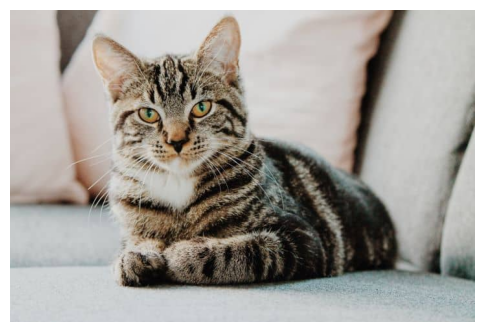

In [74]:
# Célula: carregar e exibir imagem (coloque uma imagem chamada sample.jpg na pasta do notebook)
from pathlib import Path
p = Path('imagec.jpg')
if not p.exists():
    print('Coloque um arquivo sample.jpg na pasta do notebook para testar esta célula.')
else:
    img = Image.open(p)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis('off')

shape (H,W,C): (482, 718, 3)
dtype: uint8
gray shape: (482, 718)


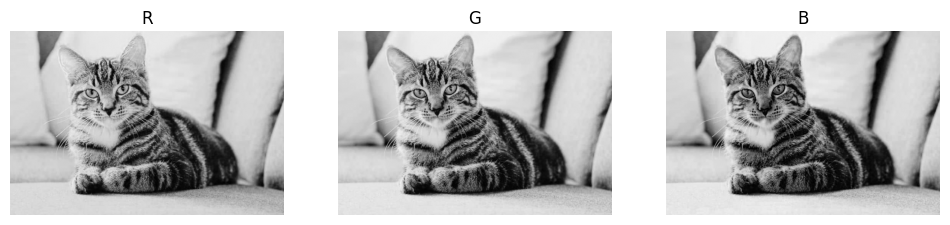

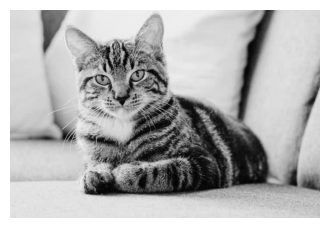

In [75]:
# Célula: mostrar matriz de pixels e forma (RGB e escala de cinza)
if p.exists():
    arr = np.array(img)
    print('shape (H,W,C):', arr.shape)
    print('dtype:', arr.dtype)
    # mostrar canais separadamente
    if arr.ndim == 3:
        fig, axes = plt.subplots(1,3,figsize=(12,4))
        for i,ax in enumerate(axes):
            ax.imshow(arr[:,:,i], cmap='gray')
            ax.set_title(['R','G','B'][i])
            ax.axis('off')
    # escala de cinza
    gray = ImageOps.grayscale(img)
    print('gray shape:', np.array(gray).shape)
    plt.figure(figsize=(4,4))
    plt.imshow(gray, cmap='gray')
    plt.axis('off')

after resize, min/max: 0.0 0.8784314


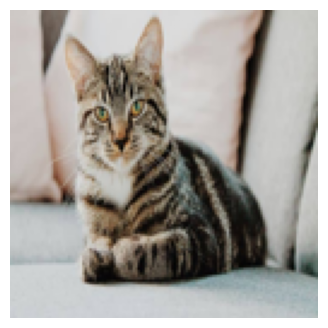

In [76]:
# Célula: normalização e redimensionamento
if p.exists():
    resized = img.resize((128,128))
    arr = np.array(resized).astype('float32') / 255.0
    print('after resize, min/max:', arr.min(), arr.max())
    plt.figure(figsize=(4,4))
    plt.imshow(arr)
    plt.axis('off')

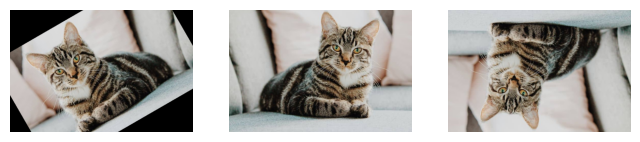

In [77]:
# Célula: data augmentation (giro, flip)
if p.exists():
    plt.figure(figsize=(8,4))
    aug = [img.rotate(30), ImageOps.mirror(img), img.transpose(Image.FLIP_TOP_BOTTOM)]
    for i,im in enumerate(aug):
        plt.subplot(1,3,i+1)
        plt.imshow(im)
        plt.axis('off')

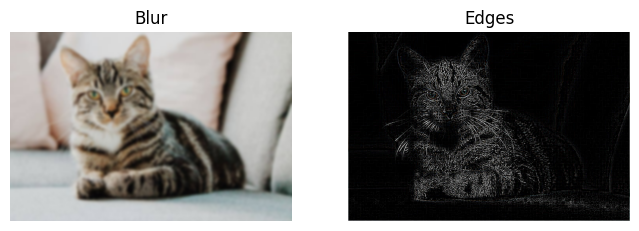

In [78]:
# Célula: aplicar filtros (desfoque e borda)
if p.exists():
    blurred = img.filter(ImageFilter.GaussianBlur(3))
    edges = img.filter(ImageFilter.FIND_EDGES)
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1); plt.imshow(blurred); plt.title('Blur'); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(edges); plt.title('Edges'); plt.axis('off')

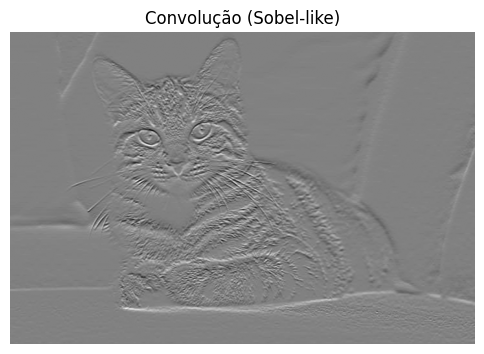

In [79]:
# Célula: convolução manual com kernel simples (soma ponderada)
import scipy.signal
if p.exists():
    gray_arr = np.array(gray).astype('float32')/255.0
    # kernel de sobel horizontal
    k = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], dtype='float32')
    conv = scipy.signal.convolve2d(gray_arr, k, mode='same', boundary='symm')
    plt.figure(figsize=(6,6))
    plt.imshow(conv, cmap='gray')
    plt.title('Convolução (Sobel-like)')
    plt.axis('off')

In [87]:
# ...existing code...
import os, webbrowser
import numpy as np
from PIL import Image
import plotly.graph_objects as go
import plotly.io as pio

fname = 'imagec.jpg'
if not os.path.exists(fname):
    raise FileNotFoundError(f"{fname} não encontrado em {os.getcwd()}")

img = Image.open(fname).convert('L')
arr = np.array(img)[::4, ::4]  # reduzir resolução opcional

# colormap claro personalizado
colorscale = [
    [0.0, 'rgb(255,255,255)'],
    [0.25, 'rgb(245,250,255)'],
    [0.5, 'rgb(220,235,255)'],
    [0.75, 'rgb(190,215,255)'],
    [1.0, 'rgb(160,195,255)']
]

fig = go.Figure(data=[go.Surface(z=arr, colorscale=colorscale, showscale=False)])
fig.update_traces(lighting=dict(ambient=0.9, diffuse=0.6, specular=0.2, roughness=0.9))
fig.update_layout(title='Superfície 3D (colormap claro)',
                  scene=dict(xaxis=dict(visible=False), yaxis=dict(visible=False),
                             zaxis=dict(visible=True, autorange='reversed')),
                  margin=dict(l=0,r=0,b=0,t=30))

# evitar render inline (problema nbformat) — gerar HTML e abrir no navegador
out = 'image3d_view.html'
pio.write_html(fig, file=out, auto_open=False)
webbrowser.open('file://' + os.path.abspath(out))
print('Aberto no navegador:', out)
# ...existing code...

Aberto no navegador: image3d_view.html


---
### Próximos passos e sugestões
- Transformar cada célula em um exercício com pontos de verificação (asserts)
- Adicionar exemplos com OpenCV (BGR vs RGB)
- Integrar com um modelo simples de classificação (MNIST / CIFAR) para ver pipeline completo


# pip (recomendado)
python -m pip install --upgrade pip
python -m pip install plotly nbformat ipympl ipywidgets pillow opencv-python scipy matplotlib
# se estiver em ambiente headless/servidor, prefira:
# python -m pip install opencv-python-headless

jupyter nbextension enable --py widgetsnbextension --sys-prefix
# reinicie o kernel/servidor do Jupyter após instalar
